In [ ]:
!pip install flask-ngrok


 Step 1: Setup & Import Libraries


In [ ]:
# Install missing packages if necessary
!pip install textblob wordcloud

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import re
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

📁 Step 2: Load Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving zomato_reviews.csv to zomato_reviews.csv


In [ ]:
# Load your Zomato review dataset
df = pd.read_csv('/content/zomato_reviews.csv')

# Preview the data
df.head()


,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


🧹 Step 3: Data Cleaning & Preprocessing

In [ ]:
# Drop duplicates and nulls
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Check column names
df.columns



Index(['Unnamed: 0', 'rating', 'review'], dtype='object')

In [ ]:
# Example (if column name is 'Reviews')
df.rename(columns={'Reviews': 'review_text'}, inplace=True)


In [ ]:
print(df.columns)  # Should now show 'review_text'
df.head()          # Check that text data is in the column


Index(['Unnamed: 0', 'rating', 'review'], dtype='object')


,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


In [ ]:
import pandas as pd

df = pd.read_csv('zomato_reviews.csv')
df.columns = df.columns.str.strip()  # Remove any accidental whitespace from column names

print("Columns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['Unnamed: 0', 'rating', 'review']


In [ ]:
df.rename(columns={' Reviews': 'review_text'}, inplace=True)


In [ ]:
df.columns = df.columns.str.strip()  # This fixes most invisible issues
df.rename(columns={'Reviews': 'review_text'}, inplace=True)


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'rating', 'review'], dtype='object')


In [ ]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('zomato_reviews.csv')

# Step 2: Clean up column names (removes spaces or \n etc.)
df.columns = df.columns.str.strip()

# Step 3: Check actual column names
print("Before renaming:", df.columns.tolist())

# Step 4: Rename the review column
df.rename(columns={'Reviews': 'review_text'}, inplace=True)

# Step 5: Verify renaming
print("After renaming:", df.columns.tolist())


Before renaming: ['Unnamed: 0', 'rating', 'review']
After renaming: ['Unnamed: 0', 'rating', 'review']


In [ ]:
if 'Reviews' in df.columns:
    df.rename(columns={'Reviews': 'review_text'}, inplace=True)


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'rating', 'review'], dtype='object')


In [ ]:
# Drop any rows with missing reviews
df = df.dropna(subset=['cleaned_review'])

# Optional: Also drop if empty string after cleaning
df = df[df['cleaned_review'].str.strip() != '']

# Now apply sentiment analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['cleaned_review'].apply(get_sentiment)
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


🔍 Step 4: Sentiment Analysis with TextBlob

In [ ]:
import re
from textblob import TextBlob

# Optional: Clean column names (in case of extra spaces)
df.columns = df.columns.str.strip()

# Rename 'review' to 'review_text' for consistency (optional but useful)
df.rename(columns={'review': 'review_text'}, inplace=True)

# Clean text
df['cleaned_review'] = df['review_text'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()

# Get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['cleaned_review'].apply(get_sentiment)

# Convert polarity to sentiment
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


📊 Step 5: Exploratory Data Analysis (EDA)

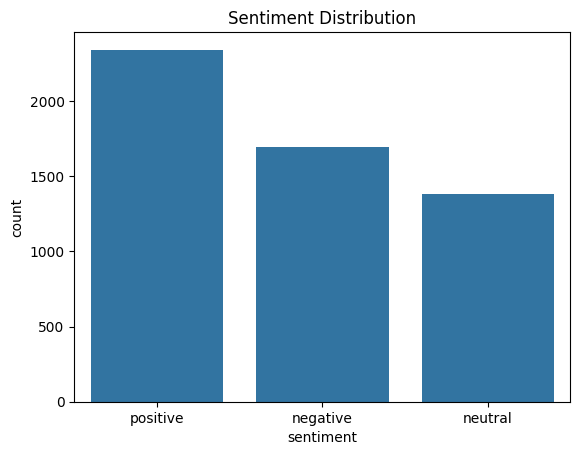

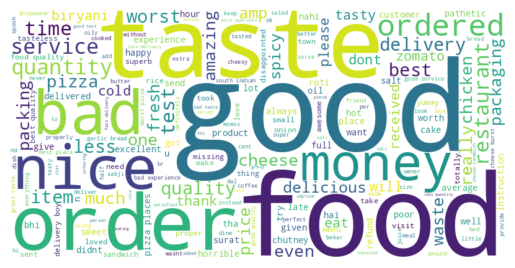

In [ ]:
# Sentiment counts
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

# Word cloud
all_words = ' '.join(df['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


🤖 Step 6: Model Building (Optional but useful)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convert text to features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.91      0.85      0.88       356
     neutral       0.82      0.92      0.87       266
    positive       0.93      0.91      0.92       463

    accuracy                           0.89      1085
   macro avg       0.89      0.89      0.89      1085
weighted avg       0.90      0.89      0.89      1085



🧠 Step 7: Save Model & Vectorizer

In [ ]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [ ]:
from google.colab import files

files.download('model.pkl')
files.download('vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'rating', 'review_text', 'cleaned_review', 'polarity',
       'sentiment'],
      dtype='object')


In [ ]:
df['cleaned_review']


,cleaned_review
0,nice
1,best biryani so supportive staff of outlet p...
2,delivery boy was very decent and supportive
3,worst biryani i have tasted in my life half of...
4,all food is good and tasty will order again a...
...,...
5474,complain
5475,it took hour to assign valvet and thn prepare...
5476,took for an hour to prepare khawsa which in r...
5477,very very late littrally did time pass and ite...


In [ ]:
df['cleaned_review']


,cleaned_review
0,nice
1,best biryani so supportive staff of outlet p...
2,delivery boy was very decent and supportive
3,worst biryani i have tasted in my life half of...
4,all food is good and tasty will order again a...
...,...
5474,complain
5475,it took hour to assign valvet and thn prepare...
5476,took for an hour to prepare khawsa which in r...
5477,very very late littrally did time pass and ite...


In [ ]:
df.dropna(subset=["review"], inplace=True)


In [ ]:
import pandas as pd
import re
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pickle

# Load the CSV file
df = pd.read_csv("zomato_reviews.csv")  # <-- make sure this is the correct file

# Check the available columns
print(df.columns)  # DEBUG: Check column names

# Clean and preprocess (use the right column name here)
df.dropna(subset=["review"], inplace=True)

# Remove unwanted characters and lowercase
df["cleaned_review"] = df["review"].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)).lower())

# Add sentiment polarity using TextBlob
df["polarity"] = df["cleaned_review"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment"] = df["polarity"].apply(lambda x: "positive" if x > 0 else ("negative" if x < 0 else "neutral"))

# Split features and target
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words="english")
X = vectorizer.fit_transform(df["cleaned_review"])
y = df["sentiment"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save model and vectorizer
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


Index(['Unnamed: 0', 'rating', 'review'], dtype='object')
              precision    recall  f1-score   support

    negative       0.92      0.77      0.84       340
     neutral       0.73      0.92      0.82       289
    positive       0.89      0.85      0.87       467

    accuracy                           0.84      1096
   macro avg       0.85      0.85      0.84      1096
weighted avg       0.86      0.84      0.85      1096



Download these files from Google Colab:

# New Section

In [ ]:
# Save model and vectorizer
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df["cleaned_review"] = df["review"].apply(clean_text)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# OR
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# OR
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
